# Data Analysis with Pandas — Day 2
## Sorting, Cleaning, Manipulation, Aggregation

This is the Day 2 notebook for the June 2021 course "Data Analysis with Pandas," part of the [Text Analysis Pedagogy Institute](https://nkelber.github.io/tapi2021/book/intro.html).

In this lesson, we will cover:

* How to Make Simple Plots
* How to Work with Missing Data
* How to Rename, Drop, and Add New Columns
* How to Sort Values
* How to Group Values
* How to Write to CSV

___

## Dataset
### Seattle Public Library Book Circulation Data

This week, we will be working with [circulation data](https://data.seattle.gov/Community/Checkouts-by-Title/tmmm-ytt6) made publicly avilable by the Seattle Public Library. The dataset includes items that were checked out 20+ times in a month between January 2015 and June 2021.

For more information about this dataset, see the Seattle Public Library's [data portal](https://data.seattle.gov/Community/Checkouts-by-Title/tmmm-ytt6).
___

## Import Pandas

To use the Pandas library, we first need to `import` it.

In [1]:
import pandas as pd

By default, Pandas will display 60 rows and 20 columns. I often change [Pandas' default display settings](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html) to show more rows or columns.

In [2]:
pd.options.display.max_colwidth = 100

## Load Data

To read in a CSV file, we will use the function `pd.read_csv()` and insert the name of our desired file path. 

In [3]:
seattle_df = pd.read_csv('Seattle-Library_2015-2021.csv', delimiter=",", encoding="utf-8")

## Make and Save Plots

Pandas makes it easy to create simple plots and data visualizations.

We can make a simple plot by adding `.plot()` to any DataFrame or Series object that has appropriate numeric data. If we use `.plot()` with a DataFrame, we need to specify an `x=` and `y=` axis.

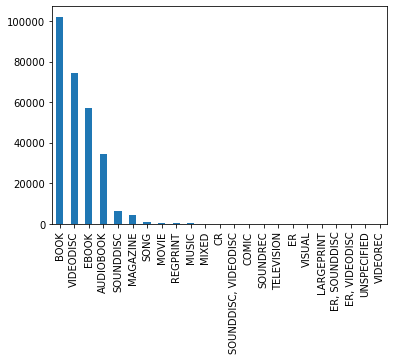

In [4]:
seattle_df['MaterialType'].value_counts().plot(kind='bar')

 We can specify the title with the `title=` parameter and the kind of plot by altering the `kind=` parameter:
* ‘bar’ or ‘barh’ for bar plots

* ‘hist’ for histogram

* ‘box’ for boxplot

* ‘kde’ or ‘density’ for density plots

* ‘area’ for area plots

* ‘scatter’ for scatter plots

* ‘hexbin’ for hexagonal bin plots

* ‘pie’ for pie plots   
 

You can read the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) or the [Matplotlib documentation about `.plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) for more details about plotting options.

<div class="admonition pythonreview" name="html-admonition" style="background: lightgreen; padding: 10px">
<p class="title"><b/>Python Review 🐍 </b></p>

Python `lists` consist of items separated by commas in square brackets.    

--> `books = ['My Brilliant Friend', 'Goosebumps', 'Man in the High Castle', 'Thick']`  

To slice a Python list and extract the first 2 values, we can use `[:2]`.e.g., `books[:2]`.  

--> `['My Brilliant Friend', 'Goosebumps']`
</div>

We can slice our value counts with Python slicing and examine only the top 5 values.

In [5]:
seattle_df['MaterialType'].value_counts()[:5]

BOOK         102076
VIDEODISC     74473
EBOOK         57299
AUDIOBOOK     34542
SOUNDDISC      6593
Name: MaterialType, dtype: int64

We could do the same thing with `.head(5)`.

In [6]:
seattle_df['MaterialType'].value_counts().head(5)

BOOK         102076
VIDEODISC     74473
EBOOK         57299
AUDIOBOOK     34542
SOUNDDISC      6593
Name: MaterialType, dtype: int64

To make a pie chart, we can set `kind='pie'`

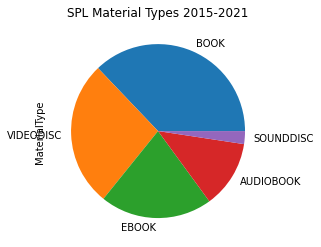

In [7]:
seattle_df['MaterialType'].value_counts()[:5].plot(title='SPL Material Types 2015-2021',
                                               kind='pie')

To save a plot as an image file or PDF file, we can assign the plot to a variable called `ax`, short for axes.

Then we can use `ax.figure.savefig('FILE-NAME.extension')`.

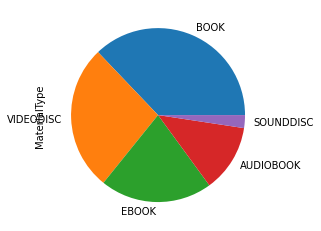

In [9]:
ax = seattle_df['MaterialType'].value_counts()[:5].plot(kind='pie')
# Save the figure as PDF
ax.figure.savefig('SPL-MaterialTypes.pdf')

## Dealing with Missing Data

<div class="admonition note" name="html-admonition" style="background: skyblue; padding: 10px">
<p class="title"><b/>Note</b></p>

The special `NaN` value for missing data is a `float`.

When `NaN`s appear in columns with text, the data type for the column is `object`, because the dtype `object` can be a mixture of text and numeric data.
</div>

We can see if data is missing or NOT missing with `.isna()` or `.notna()`.

In [10]:
seattle_df['Publisher'].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
282282    False
282283    False
282284    False
282285    False
282286    False
Name: Publisher, Length: 282287, dtype: bool

We can check to see which rows do not have "Publisher" information.

In [11]:
# Boolean vector -- create True/Falses
publisher_null_checker = seattle_df['Publisher'].isna()
# Filter
seattle_df[publisher_null_checker]

,Title,Creator,MaterialType,Checkouts,CheckoutYear,CheckoutMonth,Publisher,PublicationYear,Subjects,UsageClass,CheckoutType
10,Newsweek,NaN,MAGAZINE,141,2016,10,NaN,NaN,NaN,Digital,Zinio
42,EARTH Magazine,NaN,MAGAZINE,24,2016,10,NaN,NaN,NaN,Digital,Zinio
43,Vogue,NaN,MAGAZINE,62,2016,10,NaN,NaN,NaN,Digital,Zinio
73,You Don't Own Me,Grace feat. G-Eazy,SONG,23,2016,10,NaN,NaN,NaN,Digital,Freegal
90,Saveur,NaN,MAGAZINE,74,2016,10,NaN,NaN,NaN,Digital,Zinio
...,...,...,...,...,...,...,...,...,...,...,...
247199,Uncataloged Folder or Bag--BAL,NaN,BOOK,36,2020,3,NaN,NaN,NaN,Physical,Horizon
247357,Uncataloged Folder or Bag--LCY,NaN,BOOK,28,2020,3,NaN,NaN,NaN,Physical,Horizon
247622,Uncataloged Folder or Bag--NGA,NaN,BOOK,29,2020,3,NaN,NaN,NaN,Physical,Horizon
247962,Uncataloged Folder or Bag--NET,NaN,BOOK,48,2020,3,NaN,NaN,NaN,Physical,Horizon


We can check to see which rows do not have "Creator" information.

In [12]:
# Boolean vector -- create True/Falses
creator_null_checker = seattle_df['Creator'].isna()
# Filter
seattle_df[creator_null_checker]

,Title,Creator,MaterialType,Checkouts,CheckoutYear,CheckoutMonth,Publisher,PublicationYear,Subjects,UsageClass,CheckoutType
2,Star trek [videorecording] / Paramount ; Spyglass Entertainment ; Bad Robot ; produced by J.J. A...,NaN,VIDEODISC,36,2016,10,"Paramount Home Entertainment,",c2009.,"Kirk James T 2233 2371 Drama, Spock Mr Drama, Space ships Drama, Manned space flight Drama, Huma...",Physical,Horizon
5,Wreck-It Ralph [videorecording] / Walt Disney Animation Studios ; directed by Rich Moore ; produ...,NaN,VIDEODISC,28,2016,10,"Buena Vista Home Entertainment,",[2013],"Video game characters Juvenile drama, Arcades Juvenile drama, Heroes Juvenile drama, Feature fil...",Physical,Horizon
6,"A place to call home. Season 1 [videorecording] / Seven Productions ; series producer, Chris Mar...",NaN,VIDEODISC,38,2016,10,"[Publisher not identified],",[2015],"Nurses Drama, Families Australia Drama, Country life Drama, Man woman relationships Australia Dr...",Physical,Horizon
7,La fille du puisatier [videorecording] = The well-digger's daughter / une coproduction A.S. Film...,NaN,VIDEODISC,26,2016,10,"Manufactured and distributed by Kino Lorber,",[2012],"Fathers and daughters France Drama, Unmarried mothers France Drama, France Social life and custo...",Physical,Horizon
10,Newsweek,NaN,MAGAZINE,141,2016,10,NaN,NaN,NaN,Digital,Zinio
...,...,...,...,...,...,...,...,...,...,...,...
282119,Kajillionaire / Focus Features presents in association with Annapurna Pictures ; a Plan B Entert...,NaN,VIDEODISC,34,2021,5,"Universal Pictures Home Entertainment,",[2020],"Swindlers and swindling Drama, Children of criminals Drama, Feature films, Fiction films, Crime ...",Physical,Horizon
282122,The war with Grandpa / Universal ; 101 Studios ; Brookdale Studios ; Marro Films ; Ingenious ; p...,NaN,VIDEODISC,23,2021,5,"Universal Pictures Home Entertainment,",[2020],"Grandparent and child Drama, Practical jokes Drama, Feature films, Comedy films, Fiction films, ...",Physical,Horizon
282130,Honeyland / Neon ; Pharmachem-SkopJe ; Apolo Media ; Trice Films ; directed by Ljubo Stefanov & ...,NaN,VIDEODISC,21,2021,5,"Universal,",[2019],"Bee culture Macedonia, Beekeepers Macedonia, Honeybee Macedonia, Nature Effect of human beings o...",Physical,Horizon
282142,Dark waters / Focus Features ; Participant ; a Willi Hill/Killer Content production ; produced b...,NaN,VIDEODISC,37,2021,5,"Universal,",[2020],"Environmental lawyers Drama, Bilott Robert 1965 Drama, Water Pollution Drama, Corporations Corru...",Physical,Horizon


We can check to see which rows do have "Creator" information with `.notna()`.

In [13]:
# Boolean vector -- create True/Falses
creator_notnull_checker = seattle_df['Creator'].notna()
# Filter
seattle_df[creator_notnull_checker]

,Title,Creator,MaterialType,Checkouts,CheckoutYear,CheckoutMonth,Publisher,PublicationYear,Subjects,UsageClass,CheckoutType
0,Frog and toad all year / by Arnold Lobel.,"Lobel, Arnold",BOOK,34,2016,10,"Harper & Row,",c1976.,"Friendship Fiction, Frogs Juvenile fiction, Toads Juvenile fiction",Physical,Horizon
1,"My brilliant friend : childhood, adolescence / Elena Ferrante ; translated from the Italian by A...","Ferrante, Elena",BOOK,110,2016,10,"Europa Editions,",2012,"Friendship Fiction, Naples Italy Fiction",Physical,Horizon
3,The Man in the High Castle,Philip K. Dick,EBOOK,63,2016,10,Houghton Mifflin Harcourt Trade and Reference,2012,"Fiction, Science Fiction",Digital,OverDrive
4,"The Fifth Season: Broken Earth Series, Book 1",N. K. Jemisin,EBOOK,44,2016,10,"Hachette Digital, Inc.",2015,"Fantasy, Fiction, Thriller",Digital,OverDrive
8,"Olympians. [2], Athena : grey-eyed goddess / George O'Connor.","O'Connor, George",BOOK,22,2016,10,"First Second,",2010,"Athena Greek deity Comic books strips etc, Gods Greek Comic books strips etc, Cartoons and comic...",Physical,Horizon
...,...,...,...,...,...,...,...,...,...,...,...
282282,The Fire Next Time,James Baldwin,EBOOK,23,2021,5,"Random House, Inc.",2013,"Sociology, African American Nonfiction, Nonfiction",Digital,OverDrive
282283,"Girl, woman, other / Bernardine Evaristo.","Evaristo, Bernardine, 1959-",BOOK,22,2021,5,"Black Cat, an imprint of Grove Atlantic,",[2019],"Women Black Great Britain Fiction, Great Britain Social life and customs Fiction",Physical,Horizon
282284,Your Money or Your Life: 9 Steps to Transforming Your Relationship with Money and Achieving Fina...,Vicki Robin,AUDIOBOOK,30,2021,5,Books on Tape,2018,"Business, Finance, Self-Improvement, Nonfiction",Digital,OverDrive
282285,"Harry Potter and the Order of the Phoenix: Harry Potter Series, Book 5",J. K. Rowling,EBOOK,32,2021,5,Pottermore,2012,"Juvenile Fiction, Juvenile Literature",Digital,OverDrive


We can "fill" all `NaN` values with `.fillna()`.

In [14]:
seattle_df['Creator'].fillna('No Creator')[:15]

0                    Lobel, Arnold
1                  Ferrante, Elena
2                       No Creator
3                   Philip K. Dick
4                    N. K. Jemisin
5                       No Creator
6                       No Creator
7                       No Creator
8                 O'Connor, George
9                    Worth, Bonnie
10                      No Creator
11                      No Creator
12                     Tyler, Anne
13    Johnson, Crockett, 1906-1975
14         Abbott, Megan E., 1971-
Name: Creator, dtype: object

We can drop any row in the DataFrame that has any `NaN` value.

In [15]:
seattle_df.dropna()

,Title,Creator,MaterialType,Checkouts,CheckoutYear,CheckoutMonth,Publisher,PublicationYear,Subjects,UsageClass,CheckoutType
0,Frog and toad all year / by Arnold Lobel.,"Lobel, Arnold",BOOK,34,2016,10,"Harper & Row,",c1976.,"Friendship Fiction, Frogs Juvenile fiction, Toads Juvenile fiction",Physical,Horizon
1,"My brilliant friend : childhood, adolescence / Elena Ferrante ; translated from the Italian by A...","Ferrante, Elena",BOOK,110,2016,10,"Europa Editions,",2012,"Friendship Fiction, Naples Italy Fiction",Physical,Horizon
3,The Man in the High Castle,Philip K. Dick,EBOOK,63,2016,10,Houghton Mifflin Harcourt Trade and Reference,2012,"Fiction, Science Fiction",Digital,OverDrive
4,"The Fifth Season: Broken Earth Series, Book 1",N. K. Jemisin,EBOOK,44,2016,10,"Hachette Digital, Inc.",2015,"Fantasy, Fiction, Thriller",Digital,OverDrive
8,"Olympians. [2], Athena : grey-eyed goddess / George O'Connor.","O'Connor, George",BOOK,22,2016,10,"First Second,",2010,"Athena Greek deity Comic books strips etc, Gods Greek Comic books strips etc, Cartoons and comic...",Physical,Horizon
...,...,...,...,...,...,...,...,...,...,...,...
282282,The Fire Next Time,James Baldwin,EBOOK,23,2021,5,"Random House, Inc.",2013,"Sociology, African American Nonfiction, Nonfiction",Digital,OverDrive
282283,"Girl, woman, other / Bernardine Evaristo.","Evaristo, Bernardine, 1959-",BOOK,22,2021,5,"Black Cat, an imprint of Grove Atlantic,",[2019],"Women Black Great Britain Fiction, Great Britain Social life and customs Fiction",Physical,Horizon
282284,Your Money or Your Life: 9 Steps to Transforming Your Relationship with Money and Achieving Fina...,Vicki Robin,AUDIOBOOK,30,2021,5,Books on Tape,2018,"Business, Finance, Self-Improvement, Nonfiction",Digital,OverDrive
282285,"Harry Potter and the Order of the Phoenix: Harry Potter Series, Book 5",J. K. Rowling,EBOOK,32,2021,5,Pottermore,2012,"Juvenile Fiction, Juvenile Literature",Digital,OverDrive


Or we can drop any row in the DataFrame that has an `NaN` value in a particular column(s).

In [16]:
seattle_df.dropna(subset=['Creator', 'Publisher'])

,Title,Creator,MaterialType,Checkouts,CheckoutYear,CheckoutMonth,Publisher,PublicationYear,Subjects,UsageClass,CheckoutType
0,Frog and toad all year / by Arnold Lobel.,"Lobel, Arnold",BOOK,34,2016,10,"Harper & Row,",c1976.,"Friendship Fiction, Frogs Juvenile fiction, Toads Juvenile fiction",Physical,Horizon
1,"My brilliant friend : childhood, adolescence / Elena Ferrante ; translated from the Italian by A...","Ferrante, Elena",BOOK,110,2016,10,"Europa Editions,",2012,"Friendship Fiction, Naples Italy Fiction",Physical,Horizon
3,The Man in the High Castle,Philip K. Dick,EBOOK,63,2016,10,Houghton Mifflin Harcourt Trade and Reference,2012,"Fiction, Science Fiction",Digital,OverDrive
4,"The Fifth Season: Broken Earth Series, Book 1",N. K. Jemisin,EBOOK,44,2016,10,"Hachette Digital, Inc.",2015,"Fantasy, Fiction, Thriller",Digital,OverDrive
8,"Olympians. [2], Athena : grey-eyed goddess / George O'Connor.","O'Connor, George",BOOK,22,2016,10,"First Second,",2010,"Athena Greek deity Comic books strips etc, Gods Greek Comic books strips etc, Cartoons and comic...",Physical,Horizon
...,...,...,...,...,...,...,...,...,...,...,...
282282,The Fire Next Time,James Baldwin,EBOOK,23,2021,5,"Random House, Inc.",2013,"Sociology, African American Nonfiction, Nonfiction",Digital,OverDrive
282283,"Girl, woman, other / Bernardine Evaristo.","Evaristo, Bernardine, 1959-",BOOK,22,2021,5,"Black Cat, an imprint of Grove Atlantic,",[2019],"Women Black Great Britain Fiction, Great Britain Social life and customs Fiction",Physical,Horizon
282284,Your Money or Your Life: 9 Steps to Transforming Your Relationship with Money and Achieving Fina...,Vicki Robin,AUDIOBOOK,30,2021,5,Books on Tape,2018,"Business, Finance, Self-Improvement, Nonfiction",Digital,OverDrive
282285,"Harry Potter and the Order of the Phoenix: Harry Potter Series, Book 5",J. K. Rowling,EBOOK,32,2021,5,Pottermore,2012,"Juvenile Fiction, Juvenile Literature",Digital,OverDrive


## Revise a DataFrame

When we run `.fillna()` on a column, we are not making permanent changes to that column or the DataFrame.

In [17]:
seattle_df['Creator'].fillna('No Creator')

0                       Lobel, Arnold
1                     Ferrante, Elena
2                          No Creator
3                      Philip K. Dick
4                       N. K. Jemisin
                     ...             
282282                  James Baldwin
282283    Evaristo, Bernardine, 1959-
282284                    Vicki Robin
282285                  J. K. Rowling
282286        Tressie McMillan Cottom
Name: Creator, Length: 282287, dtype: object

For example, if we look at this column, we can see that `NaN` values are still there.

In [18]:
seattle_df['Creator']

0                       Lobel, Arnold
1                     Ferrante, Elena
2                                 NaN
3                      Philip K. Dick
4                       N. K. Jemisin
                     ...             
282282                  James Baldwin
282283    Evaristo, Bernardine, 1959-
282284                    Vicki Robin
282285                  J. K. Rowling
282286        Tressie McMillan Cottom
Name: Creator, Length: 282287, dtype: object

To revise a column or an entire DataFrame, we need to reassign the column to itself.

In [19]:
seattle_df['Creator'] = seattle_df['Creator'].fillna('No Creator')
seattle_df['Publisher'] = seattle_df['Publisher'].fillna('No Creator')

Now the changes are permanent!

In [20]:
seattle_df['Creator']

0                       Lobel, Arnold
1                     Ferrante, Elena
2                          No Creator
3                      Philip K. Dick
4                       N. K. Jemisin
                     ...             
282282                  James Baldwin
282283    Evaristo, Bernardine, 1959-
282284                    Vicki Robin
282285                  J. K. Rowling
282286        Tressie McMillan Cottom
Name: Creator, Length: 282287, dtype: object

We can rename a column with `.rename(columns={})` and include a `key:value` pair for `'original column':'renamed column'`.

Again, changes will not be permanent unless we reassign the DataFrame.

In [21]:
seattle_df.rename(columns={'Creator': 'Author'})

,Title,Author,MaterialType,Checkouts,CheckoutYear,CheckoutMonth,Publisher,PublicationYear,Subjects,UsageClass,CheckoutType
0,Frog and toad all year / by Arnold Lobel.,"Lobel, Arnold",BOOK,34,2016,10,"Harper & Row,",c1976.,"Friendship Fiction, Frogs Juvenile fiction, Toads Juvenile fiction",Physical,Horizon
1,"My brilliant friend : childhood, adolescence / Elena Ferrante ; translated from the Italian by A...","Ferrante, Elena",BOOK,110,2016,10,"Europa Editions,",2012,"Friendship Fiction, Naples Italy Fiction",Physical,Horizon
2,Star trek [videorecording] / Paramount ; Spyglass Entertainment ; Bad Robot ; produced by J.J. A...,No Creator,VIDEODISC,36,2016,10,"Paramount Home Entertainment,",c2009.,"Kirk James T 2233 2371 Drama, Spock Mr Drama, Space ships Drama, Manned space flight Drama, Huma...",Physical,Horizon
3,The Man in the High Castle,Philip K. Dick,EBOOK,63,2016,10,Houghton Mifflin Harcourt Trade and Reference,2012,"Fiction, Science Fiction",Digital,OverDrive
4,"The Fifth Season: Broken Earth Series, Book 1",N. K. Jemisin,EBOOK,44,2016,10,"Hachette Digital, Inc.",2015,"Fantasy, Fiction, Thriller",Digital,OverDrive
...,...,...,...,...,...,...,...,...,...,...,...
282282,The Fire Next Time,James Baldwin,EBOOK,23,2021,5,"Random House, Inc.",2013,"Sociology, African American Nonfiction, Nonfiction",Digital,OverDrive
282283,"Girl, woman, other / Bernardine Evaristo.","Evaristo, Bernardine, 1959-",BOOK,22,2021,5,"Black Cat, an imprint of Grove Atlantic,",[2019],"Women Black Great Britain Fiction, Great Britain Social life and customs Fiction",Physical,Horizon
282284,Your Money or Your Life: 9 Steps to Transforming Your Relationship with Money and Achieving Fina...,Vicki Robin,AUDIOBOOK,30,2021,5,Books on Tape,2018,"Business, Finance, Self-Improvement, Nonfiction",Digital,OverDrive
282285,"Harry Potter and the Order of the Phoenix: Harry Potter Series, Book 5",J. K. Rowling,EBOOK,32,2021,5,Pottermore,2012,"Juvenile Fiction, Juvenile Literature",Digital,OverDrive


We can add an entirely new column to a DataFrame simply by assigning values to a new column name. 

In [22]:
seattle_df['Maker'] = seattle_df['Creator']

In [23]:
seattle_df

,Title,Creator,MaterialType,Checkouts,CheckoutYear,CheckoutMonth,Publisher,PublicationYear,Subjects,UsageClass,CheckoutType,Maker
0,Frog and toad all year / by Arnold Lobel.,"Lobel, Arnold",BOOK,34,2016,10,"Harper & Row,",c1976.,"Friendship Fiction, Frogs Juvenile fiction, Toads Juvenile fiction",Physical,Horizon,"Lobel, Arnold"
1,"My brilliant friend : childhood, adolescence / Elena Ferrante ; translated from the Italian by A...","Ferrante, Elena",BOOK,110,2016,10,"Europa Editions,",2012,"Friendship Fiction, Naples Italy Fiction",Physical,Horizon,"Ferrante, Elena"
2,Star trek [videorecording] / Paramount ; Spyglass Entertainment ; Bad Robot ; produced by J.J. A...,No Creator,VIDEODISC,36,2016,10,"Paramount Home Entertainment,",c2009.,"Kirk James T 2233 2371 Drama, Spock Mr Drama, Space ships Drama, Manned space flight Drama, Huma...",Physical,Horizon,No Creator
3,The Man in the High Castle,Philip K. Dick,EBOOK,63,2016,10,Houghton Mifflin Harcourt Trade and Reference,2012,"Fiction, Science Fiction",Digital,OverDrive,Philip K. Dick
4,"The Fifth Season: Broken Earth Series, Book 1",N. K. Jemisin,EBOOK,44,2016,10,"Hachette Digital, Inc.",2015,"Fantasy, Fiction, Thriller",Digital,OverDrive,N. K. Jemisin
...,...,...,...,...,...,...,...,...,...,...,...,...
282282,The Fire Next Time,James Baldwin,EBOOK,23,2021,5,"Random House, Inc.",2013,"Sociology, African American Nonfiction, Nonfiction",Digital,OverDrive,James Baldwin
282283,"Girl, woman, other / Bernardine Evaristo.","Evaristo, Bernardine, 1959-",BOOK,22,2021,5,"Black Cat, an imprint of Grove Atlantic,",[2019],"Women Black Great Britain Fiction, Great Britain Social life and customs Fiction",Physical,Horizon,"Evaristo, Bernardine, 1959-"
282284,Your Money or Your Life: 9 Steps to Transforming Your Relationship with Money and Achieving Fina...,Vicki Robin,AUDIOBOOK,30,2021,5,Books on Tape,2018,"Business, Finance, Self-Improvement, Nonfiction",Digital,OverDrive,Vicki Robin
282285,"Harry Potter and the Order of the Phoenix: Harry Potter Series, Book 5",J. K. Rowling,EBOOK,32,2021,5,Pottermore,2012,"Juvenile Fiction, Juvenile Literature",Digital,OverDrive,J. K. Rowling


We can drop a column by using `.drop()` and specifiying the name of the column and `axis=columns`.

In [24]:
seattle_df = seattle_df.drop('Maker', axis='columns')

## Making a DataFrame Copy

Sometimes we don't want to write over our DataFrame. Instead we want to make a new DataFrame.

We can assign a DataFrame to a new variable with `df.copy()`.

For example, if we wanted to make a DataFrame `book_df` that only contains books, we could filter for only books, make a copy of this filtered DataFrame, and then reassign to a new variable.

In [26]:
# Boolean vector
book_filter = seattle_df['MaterialType'] == 'BOOK'

# Create a copy of the filtered DataFrame and save as new DataFrame
book_df = seattle_df[book_filter].copy()

In [27]:
book_df.sample(4)

,Title,Creator,MaterialType,Checkouts,CheckoutYear,CheckoutMonth,Publisher,PublicationYear,Subjects,UsageClass,CheckoutType
179155,"Plants vs. zombies. Garden warfare, volume 2 / written by Paul Tobin ; art by Tim Lattie ; color...","Tobin, Paul, 1965-",BOOK,21,2018,10,"Dark Horse Books,",September 2018.,"Zombies Comic books strips etc, Plants Comic books strips etc, Science fiction comics, Graphic n...",Physical,Horizon
69513,Friends / Eric Carle.,"Carle, Eric",BOOK,21,2016,3,"Philomel Books, an imprint of Penguin Group (USA), Inc.,",[2013],"Friendship in children Juvenile fiction, Voyages and travels Juvenile fiction, Friendship Fiction",Physical,Horizon
80423,Just a baby bird / by Mercer Mayer.,"Mayer, Mercer, 1943-",BOOK,30,2016,5,"Harper, an imprint of HarperCollinsPublishers,",[2016],"Birds Juvenile fiction, Birds Fiction",Physical,Horizon
21918,Killing Patton : the strange death of World War II's most audacious general / Bill O'Reilly and ...,"O'Reilly, Bill",BOOK,24,2015,2,"Henry Holt and Company,",2014,Patton George S George Smith 1885 1945 Death and burial,Physical,Horizon


## Sort Values

We can sort a DataFrame by a particular column with `.sort_values()`.

For a DataFrame, we also need to specify the column that we want to sort by (`by=`) and whether the sort order should be ascending (`ascending=True`) or False (`ascending=False`).

In [28]:
seattle_df.sort_values(by='Checkouts', ascending=False)

,Title,Creator,MaterialType,Checkouts,CheckoutYear,CheckoutMonth,Publisher,PublicationYear,Subjects,UsageClass,CheckoutType
253088,So You Want to Talk about Race (Unabridged),Ijeoma Oluo,AUDIOBOOK,4903,2020,6,"Blackstone Audio, Inc.",2018,"African American Nonfiction, Nonfiction, Politics, Sociology",Digital,OverDrive
253219,White Fragility: Why It's So Hard for White People to Talk About Racism,Robin DiAngelo,EBOOK,2177,2020,6,"Random House, Inc.",2018,"Family & Relationships, Nonfiction, Self-Improvement, Sociology",Digital,OverDrive
178318,FlexTech--Laptops.,No Creator,MIXED,2073,2018,10,"Lenovo,",[2013-].,"Laptop computers, iPad Computer, Tablet computers",Physical,Horizon
255523,So You Want to Talk about Race (Unabridged),Ijeoma Oluo,AUDIOBOOK,2016,2020,7,"Blackstone Audio, Inc.",2018,"African American Nonfiction, Nonfiction, Politics, Sociology",Digital,OverDrive
249092,"Harry Potter and the Sorcerer's Stone: Harry Potter Series, Book 1 (unabridged) (Unabridged)",J. K. Rowling,AUDIOBOOK,1894,2020,4,Pottermore,2012,"Juvenile Fiction, Juvenile Literature",Digital,OverDrive
...,...,...,...,...,...,...,...,...,...,...,...
67646,Near & far : recipes inspired by home and travels / Heidi Swanson.,"Swanson, Heidi, 1973-",BOOK,20,2016,2,"Ten Speed Press,",[2015],"Vegetarian cooking, International cooking, Cookbooks",Physical,Horizon
227030,Endeavour. The complete fourth season / a co-production of Mammoth Screen and Masterpiece in ass...,No Creator,VIDEODISC,20,2019,10,"PBS Distribution,",[2017],"Morse Inspector Fictitious character Drama, Law enforcement England Oxford Drama, Police England...",Physical,Horizon
227031,My toothbrush is missing! / Jan Thomas.,"Thomas, Jan, 1958-",BOOK,20,2019,10,"Houghton Mifflin Harcourt,",[2018],"Lost articles Juvenile fiction, Toothbrushes Juvenile fiction, Friendship Juvenile fiction, Lost...",Physical,Horizon
227034,Past tense / Lee Child.,"Child, Lee",BOOK,20,2019,10,"Delacorte Press,",2018,"Reacher Jack Fictitious character Fiction, Voyages and travels Fiction, Fathers and sons Fiction...",Physical,Horizon


We can sort by multiple columns by putting them in square brackets as a list.

In [31]:
seattle_df.sort_values(by=['CheckoutYear', 'Checkouts'], ascending=[False, False])

,Title,Creator,MaterialType,Checkouts,CheckoutYear,CheckoutMonth,Publisher,PublicationYear,Subjects,UsageClass,CheckoutType
273885,Love Lettering: A Witty and Heartfelt Love Story,Kate Clayborn,EBOOK,1232,2021,2,Lightning Source Inc,2020,"Fiction, Humor (Fiction), Literature, Romance",Digital,OverDrive
277399,Nomadland: Surviving America in the Twenty-First Century,Jessica Bruder,EBOOK,1182,2021,4,W. W. Norton & Company,2017,"Business, Sociology, Nonfiction",Digital,OverDrive
278074,"The Art of Taking It Easy: How to Cope with Bears, Traffic, and the Rest of Life's Stressors",Brian King,EBOOK,1001,2021,4,Lightning Source Inc,2021,"Business, Self-Improvement, Nonfiction, Humor (Nonfiction)",Digital,OverDrive
281581,Nomadland: Surviving America in the Twenty-First Century,Jessica Bruder,EBOOK,900,2021,5,W. W. Norton & Company,2017,"Business, Sociology, Nonfiction",Digital,OverDrive
269071,A Promised Land (Unabridged),Barack Obama,AUDIOBOOK,820,2021,1,Books on Tape,2020,"Biography & Autobiography, History, Nonfiction, Politics",Digital,OverDrive
...,...,...,...,...,...,...,...,...,...,...,...
61388,The Valley of Amazement,Amy Tan,EBOOK,20,2015,12,HarperCollins Publishers Inc.,2013,"Fiction, Historical Fiction, Literature",Digital,OverDrive
61397,The harvest [videorecording] / IFC Midnight ; Elephant Eye Films ; 120dB Films ; produced by Kim...,No Creator,VIDEODISC,20,2015,12,"[Publisher not identified],",[2015],"Parents of chronically ill children Drama, Family secrets Drama, Neighbors Drama, Feature films,...",Physical,Horizon
61409,Sunny side up / Jennifer L. Holm & Matthew Holm ; with color by Lark Pien.,"Holm, Jennifer L.",BOOK,20,2015,12,"Graphix, an imprint of Scholastic,",2015,"Grandparent and child Comic books strips etc, Dysfunctional families Comic books strips etc, Fam...",Physical,Horizon
61432,"12th of Never: Women's Murder Club Series, Book 12",James Patterson,EBOOK,20,2015,12,"Hachette Digital, Inc.",2013,"Fiction, Thriller",Digital,OverDrive


We can sort a Series by simply using `.sort_values()`. Since there is only one column, we do not need to specify to sort `by=` a particular column.

In [32]:
seattle_df['Checkouts'].sort_values(ascending=False)

253088    4903
253219    2177
178318    2073
255523    2016
249092    1894
          ... 
67646       20
227030      20
227031      20
227034      20
77356       20
Name: Checkouts, Length: 282287, dtype: int64

## Groupby

<div class="admonition note" name="html-admonition" style="background: lightyellow; padding: 10px">
<p class="Question"><b/>❓ Question</b></p>

What is the total number of books checked out across the entire period 2015-2021?

How does this number compare to the total number of ebooks, audiobooks, or videodiscs that were checked out?

To answer these question, we can use `.groupby()`.
</div>

With `.groupby()`, we can split the DataFrame into groups, calculate statistics on those groups, and return collective results.

For example, we can split the DataFrame into groups according to checkout material type, then calculate the sum total checkouts for each group.

In [34]:
seattle_df.groupby('MaterialType')['Checkouts'].sum()

MaterialType
AUDIOBOOK               1576126
BOOK                    4002237
COMIC                      2363
CR                         4852
EBOOK                   2666013
ER                         1999
ER, SOUNDDISC               397
ER, VIDEODISC               275
LARGEPRINT                  530
MAGAZINE                 284211
MIXED                     83514
MOVIE                     19513
MUSIC                     13873
REGPRINT                  21277
SONG                      40714
SOUNDDISC                206122
SOUNDDISC, VIDEODISC       2905
SOUNDREC                   1973
TELEVISION                 1177
UNSPECIFIED                  42
VIDEODISC               3704156
VIDEOREC                     45
VISUAL                      772
Name: Checkouts, dtype: int64

We can also split the DataFrame into groups according to checkout material type, then calculate the mean total checkouts for each group.

In [35]:
materialtype_groups = seattle_df.groupby('MaterialType')

materialtype_groups['Checkouts'].mean()

MaterialType
AUDIOBOOK                45.629263
BOOK                     39.208404
COMIC                    28.469880
CR                       43.321429
EBOOK                    46.528089
ER                       58.794118
ER, SOUNDDISC            39.700000
ER, VIDEODISC            30.555556
LARGEPRINT               27.894737
MAGAZINE                 67.717655
MIXED                   428.276923
MOVIE                    32.739933
MUSIC                    36.316754
REGPRINT                 47.599553
SONG                     41.757949
SOUNDDISC                31.263765
SOUNDDISC, VIDEODISC     32.640449
SOUNDREC                 24.060976
TELEVISION               30.179487
UNSPECIFIED              21.000000
VIDEODISC                49.738241
VIDEOREC                 22.500000
VISUAL                   24.903226
Name: Checkouts, dtype: float64

We can add on `sort_values()` to sort the results.

In [36]:
materialtype_groups['Checkouts'].mean().sort_values()

MaterialType
UNSPECIFIED              21.000000
VIDEOREC                 22.500000
SOUNDREC                 24.060976
VISUAL                   24.903226
LARGEPRINT               27.894737
COMIC                    28.469880
TELEVISION               30.179487
ER, VIDEODISC            30.555556
SOUNDDISC                31.263765
SOUNDDISC, VIDEODISC     32.640449
MOVIE                    32.739933
MUSIC                    36.316754
BOOK                     39.208404
ER, SOUNDDISC            39.700000
SONG                     41.757949
CR                       43.321429
AUDIOBOOK                45.629263
EBOOK                    46.528089
REGPRINT                 47.599553
VIDEODISC                49.738241
ER                       58.794118
MAGAZINE                 67.717655
MIXED                   428.276923
Name: Checkouts, dtype: float64

<div class="admonition note" name="html-admonition" style="background: lightyellow; padding: 10px">
<p class="Question"><b/>❓ Question</b></p>

What are the most checked out *titles* across the entire period 2015-2021?

To answer this question, we can again use `.groupby()`.
</div>

With `.groupby()`, we can split the DataFrame into groups, calculate statistics on those groups, and return collective results.

For example, we can split the DataFrame into groups according to title, then calculate the sum total checkouts for each group.

In [37]:
title_groups = seattle_df.groupby('Title')

title_groups[['Checkouts']].sum().sort_values(by='Checkouts', ascending=False)

,Checkouts
Title,
FlexTech--Laptops.,25464
SPL HotSpot : connecting Seattle / [distributed by Verizon Wireless].,19952
The New Yorker,18554
The Economist,17663
SPL HotSpot : connecting Seattle / [distributed by T-Mobile].,17458
...,...
Forest Dark: A Novel,20
Serena the salsa fairy / by Daisy Meadows.,20
For Whom the Bell Tolls,20


We can even plot these results.

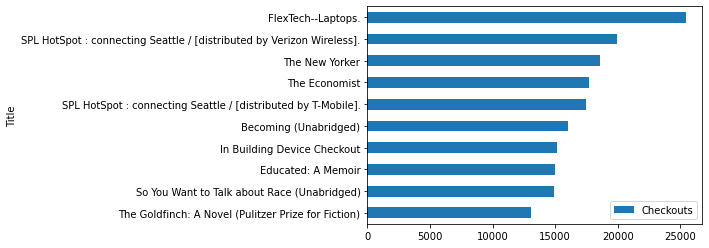

In [38]:
top10_df = seattle_df.groupby(['Title'])[['Checkouts']].sum()\
            .sort_values(by='Checkouts', ascending=False)[:10]

top10_df.plot(kind='barh').invert_yaxis()

We can `.groupby()` multiple columns by putting the columns in square brackets as a list.

In [39]:
titleauthor_groups = seattle_df.groupby(['Title', 'Creator'])

titleauthor_groups[['Checkouts']].sum().sort_values(by='Checkouts', ascending=False)

,,Checkouts
Title,Creator,
FlexTech--Laptops.,No Creator,25464
SPL HotSpot : connecting Seattle / [distributed by Verizon Wireless].,No Creator,19952
The New Yorker,No Creator,18554
The Economist,No Creator,17663
SPL HotSpot : connecting Seattle / [distributed by T-Mobile].,No Creator,17458
...,...,...
Full Moon And Empty Arms,Bob Dylan,20
The animators : a novel / Kayla Rae Whitaker.,"Whitaker, Kayla Rae,",20
"FukuFuku : kitten tales. 1 / Konami Kanata ; translation, Marlaina McElheny, Ed Chavez.","Konami, Kanata, 1958-",20


<div class="admonition note" name="html-admonition" style="background: lightyellow; padding: 10px">
<p class="Question"><b/>❓ Question</b></p>

What is the total number of books, ebooks, audiobooks checked out *per year* across the entire period 2015-2021? How do these rates fluctuate over time?

To answer these question, we can use `.groupby()`.
</div>

In [43]:
materialtypeyear_groups = seattle_df.groupby(['MaterialType', 'CheckoutYear'])

materialtypeyear_groups[['Checkouts']].sum()

Checkouts
MaterialType CheckoutYear           
AUDIOBOOK    2015              44663
             2016              74295
             2017             114625
             2018             204860
             2019             387261
...                              ...
VIDEODISC    2021              23427
VIDEOREC     2017                 45
VISUAL       2015                298
             2016                350
             2017                124

[111 rows x 1 columns]

In [44]:
materialtypeyear_groups[['Checkouts']].sum().reset_index()

,MaterialType,CheckoutYear,Checkouts
0,AUDIOBOOK,2015,44663
1,AUDIOBOOK,2016,74295
2,AUDIOBOOK,2017,114625
3,AUDIOBOOK,2018,204860
4,AUDIOBOOK,2019,387261
...,...,...,...
106,VIDEODISC,2021,23427
107,VIDEOREC,2017,45
108,VISUAL,2015,298
109,VISUAL,2016,350


We can plot checkouts of the different material types over time. However, Pandas doesn't make it easy to distinguish between the material types.

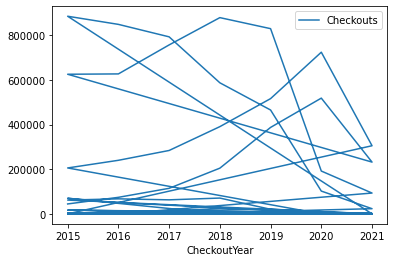

In [46]:
materialtype_checkouts_byyear = materialtypeyear_groups[['Checkouts']].sum().reset_index()

materialtype_checkouts_byyear.plot(x='CheckoutYear', y='Checkouts')

In this case, we will be better served by incoroprating a different data viz library that handles coloring by category more easily.

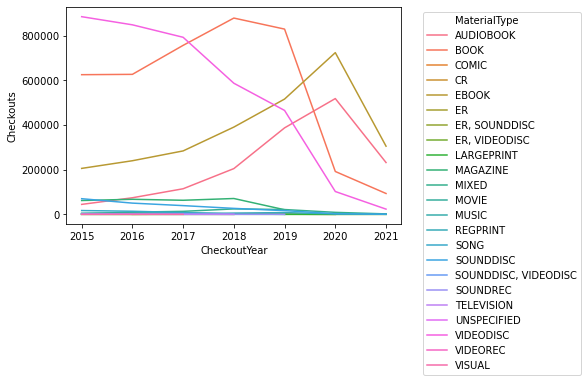

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

materialtype_checkouts_byyear = seattle_df.groupby(['MaterialType', 'CheckoutYear'])\
                                [['Checkouts']].sum().reset_index()

# Use Seaborn to make a line plot
sns.lineplot(data=materialtype_checkouts_byyear,
             x='CheckoutYear', y='Checkouts', hue='MaterialType')

# Put legend to the right
plt.legend(bbox_to_anchor=(1.05, 1))

That's a lot of types! Most of the types have few checkouts.

If we wanted to focus on a few of the main material types, we could filter with `.isin()` before plotting.

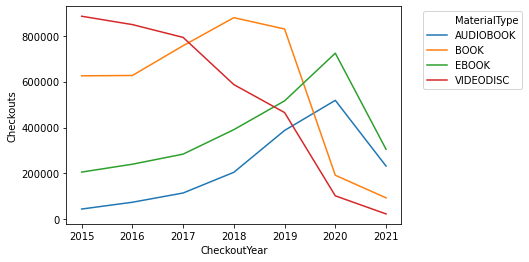

In [48]:
top_material_filter = materialtype_checkouts_byyear['MaterialType']\
                        .isin(['BOOK', 'EBOOK', 'AUDIOBOOK', 'VIDEODISC'])

# Use Seaborn to make a line plot
sns.lineplot(data=materialtype_checkouts_byyear[top_material_filter],
             x='CheckoutYear', y='Checkouts', hue='MaterialType')

# Put legend to the right
plt.legend(bbox_to_anchor=(1.05, 1))

## Write to CSV

We can output a DataFrame as a new CSV file with `.to_csv('filename.csv')`. If we don't want to include the index as a column, we can specify `index=False`.

In [ ]:
# Boolean vector
book_filter = seattle_df['MaterialType'] == 'BOOK'

# Create a copy of the filtered DataFrame and save as new DataFrame
book_df = seattle_df[book_filter].copy()

book_df.head()

Write the books DataFrame to a CSV file.

In [ ]:
book_df.to_csv('SPL-Books.csv')

We can output an aggregated DataFrame of total checkouts per title.

In [49]:
titleauthor_groups = seattle_df.groupby(['Title', 'Creator'])

titleauthor_groups[['Checkouts']].sum().sort_values(by='Checkouts', ascending=False).reset_index()

,Title,Creator,Checkouts
0,FlexTech--Laptops.,No Creator,25464
1,SPL HotSpot : connecting Seattle / [distributed by Verizon Wireless].,No Creator,19952
2,The New Yorker,No Creator,18554
3,The Economist,No Creator,17663
4,SPL HotSpot : connecting Seattle / [distributed by T-Mobile].,No Creator,17458
...,...,...,...
32175,Full Moon And Empty Arms,Bob Dylan,20
32176,The animators : a novel / Kayla Rae Whitaker.,"Whitaker, Kayla Rae,",20
32177,"FukuFuku : kitten tales. 1 / Konami Kanata ; translation, Marlaina McElheny, Ed Chavez.","Konami, Kanata, 1958-",20
32178,Beowulf,No Creator,20


In [50]:
total_checkouts_per_title = titleauthor_groups[['Checkouts']]\
                            .sum().sort_values(by='Checkouts', ascending=False).reset_index()

In [51]:
total_checkouts_per_title.to_csv('Total-SPL-Checkouts_2015-2021.csv', index=False)